In [531]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [532]:
core_vals=[4, 8, 12] #3 possible values
gpu_vals=[114750000, 318750000, 522750000, 726750000, 930750000, 1134750000, 1300500000]
cpu_vals=[422400, 729600, 1036800, 1344000, 1651200, 1958400, 2201600] #in kHz, 7 possible values
mem_vals = [665600000, 2133000000, 3199000000]

mid_core = 8
mid_gpu = 726750000
mid_cpu = 1344000
mid_mem = 2133000000

In [533]:
def data_filter_max(data, axis):

    if axis == 'cores':
        gpu_value = gpu_vals[-1]
        cpu_value = cpu_vals[-1]
        mem_value = mem_vals[-1]
        data = data[(data['gpu'] == gpu_value) & (data['cpu'] == cpu_value) & (data['mem'] == mem_value)]
    
    elif axis == 'gpu':
        core_value = core_vals[-1]
        cpu_value = cpu_vals[-1]
        mem_value = mem_vals[-1]
        data = data[(data['cores'] == core_value) & (data['cpu'] == cpu_value) & (data['mem'] == mem_value)]

    elif axis == 'cpu':
        core_value = core_vals[-1]
        gpu_value = gpu_vals[-1]
        mem_value = mem_vals[-1]
        data = data[(data['cores'] == core_value) & (data['gpu'] == gpu_value) & (data['mem'] == mem_value)]
    
    else:
        core_value = core_vals[-1]
        gpu_value = gpu_vals[-1]
        cpu_value = cpu_vals[-1]
        data = data[(data['cores'] == core_value) & (data['gpu'] == gpu_value) & (data['cpu'] == cpu_value)]

    return data

In [534]:
def data_filter_mid(data, axis):

    mid_core = 8
    mid_gpu = 726750000
    mid_cpu = 1344000
    mid_mem = 2133000000

    if axis == 'cores':
        gpu_value = mid_gpu
        cpu_value = mid_cpu
        mem_value = mid_mem
        data = data[(data['gpu'] == gpu_value) & (data['cpu'] == cpu_value) & (data['mem'] == mem_value)]
    
    elif axis == 'gpu':
        core_value = mid_core
        cpu_value = mid_cpu
        mem_value = mid_mem
        data = data[(data['cores'] == core_value) & (data['cpu'] == cpu_value) & (data['mem'] == mem_value)]

    elif axis == 'cpu':
        core_value = mid_core
        gpu_value = mid_gpu
        mem_value = mid_mem
        data = data[(data['cores'] == core_value) & (data['gpu'] == gpu_value) & (data['mem'] == mem_value)]

    else:
        core_value = mid_core
        gpu_value = mid_gpu
        cpu_value = mid_cpu
        data = data[(data['cores'] == core_value) & (data['gpu'] == gpu_value) & (data['cpu'] == cpu_value)]
    
    return data

 


In [535]:
def plot_data_time(data, axis, model):
    data_max = data_filter_max(data, axis)
    data_mid = data_filter_mid(data, axis)

    data_max['cpu'] = data_max['cpu']/1000
    data_max['gpu'] = data_max['gpu']/1000000
    data_max['mem'] = data_max['mem']/1000000 

    data_mid['cpu'] = data_mid['cpu']/1000
    data_mid['gpu'] = data_mid['gpu']/1000000
    data_mid['mem'] = data_mid['mem']/1000000

    # Add gridlines first
    plt.grid(True)

    # Plot the scatter points with a higher zorder
    plt.scatter(data_max[axis], data_max['observed_time'], zorder=2, color='red')
    plt.scatter(data_mid[axis], data_mid['observed_time'], zorder=2, color='blue')

    data_max.sort_values(by='mem', inplace=True)
    data_mid.sort_values(by='mem', inplace=True)

    plt.plot(data_max[axis], data_max['observed_time'], color='red', linewidth=1, zorder=2)
    plt.plot(data_mid[axis], data_mid['observed_time'], color='blue', linewidth=1, zorder=2)

    if axis == 'cores':
        plt.xlabel('Cores')
    elif axis == 'cpu':
        plt.xlabel('CPU Frequency (MHz)')
    elif axis == 'gpu':
        plt.xlabel('GPU Frequency (MHz)')
    else:
        plt.xlabel('Memory Frequency (MHz)')
    # plt.xlabel(axis)
    plt.ylabel('Minibatch Time (ms)')
    plt.xlim(0, max(data_max[axis])*1.2)
    plt.ylim(0, max(data_mid['observed_time'])*1.2)
    plt.title(f'{model.capitalize()} {axis.capitalize()} vs Time')
    plt.xticks(data_max[axis], rotation=90)
    plt.ticklabel_format(style='plain')
    plt.legend(['Max', 'Mid'])

    plt.show()

In [536]:
def plot_data_power(data, axis, model):
    data_max = data_filter_max(data, axis)
    data_mid = data_filter_mid(data, axis)

    data_max['cpu'] = data_max['cpu']/1000
    data_max['gpu'] = data_max['gpu']/1000000
    data_max['mem'] = data_max['mem']/1000000 

    data_mid['cpu'] = data_mid['cpu']/1000
    data_mid['gpu'] = data_mid['gpu']/1000000
    data_mid['mem'] = data_mid['mem']/1000000


    # Add gridlines first
    plt.grid(True)

    # Plot the scatter points with a higher zorder
    plt.scatter(data_max[axis], data_max['observed_power'], zorder=2, color='red')
    plt.scatter(data_mid[axis], data_mid['observed_power'], zorder=2, color='blue')

    # Plot a line connecting the points
    data_max.sort_values(by='mem', inplace=True)
    data_mid.sort_values(by='mem', inplace=True)

    plt.plot(data_max[axis], data_max['observed_power'], color='red', linewidth=1, zorder=2)
    plt.plot(data_mid[axis], data_mid['observed_power'], color='blue', linewidth=1, zorder=2)

    if axis == 'cores':
        plt.xlabel('Cores')
    elif axis == 'cpu':
        plt.xlabel('CPU Frequency (MHz)')
    elif axis == 'gpu':
        plt.xlabel('GPU Frequency (MHz)')
    else:
        plt.xlabel('Memory Frequency (MHz)')
        
    plt.ylabel('Power (w)')
    plt.xlim(0, max(data_max[axis])*1.2)
    plt.ylim(0, max(data_max['observed_power'])*1.2)

    # x ticks will be the data[axis]
    plt.xticks(data_max[axis], rotation=90)
    plt.ticklabel_format(style='plain')


    plt.title(f'{model.capitalize()} {axis.capitalize()} vs Power')
    plt.legend(['Max', 'Mid'])

    plt.show()

In [537]:
model = 'mobnet'
train_data = pd.read_csv(f'/home/saisamarth/exp/{model}_train_data_final.csv')
train_data

,cores,cpu,gpu,mem,observed_time,observed_power
0,2,268800,1300500000,204000000,1105.067078,17.7045
1,2,268800,1300500000,2133000000,649.863098,18.7580
2,2,268800,1300500000,3199000000,615.035431,19.7600
3,2,268800,1300500000,665600000,751.245148,18.2540
4,2,268800,1236750000,204000000,3289.224731,14.4450
...,...,...,...,...,...,...
4363,12,2201600,216750000,665600000,455.977402,18.2570
4364,12,2201600,114750000,204000000,1117.970886,15.9490
4365,12,2201600,114750000,2133000000,775.267059,17.3570
4366,12,2201600,114750000,3199000000,772.271240,18.1630


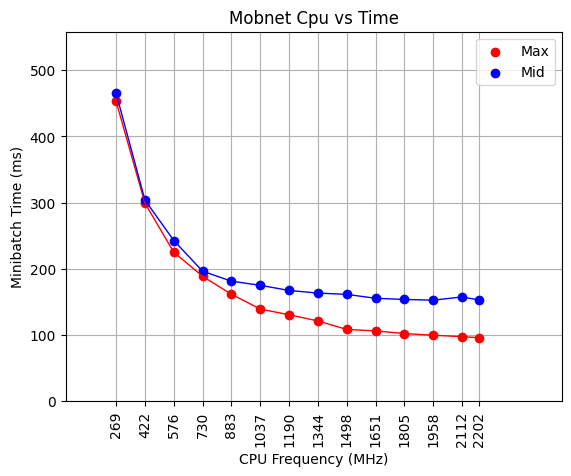

In [538]:
axis = 'cpu'
plot_data_time(train_data, axis, model)

In [539]:
import matplotlib.cm as cm

colors = [
    '#1f77b4',  # Muted blue
    '#ff7f0e',  # Safety orange
    '#2ca02c',  # Cooked asparagus green
    '#d62728',  # Brick red
    '#9467bd',  # Muted purple
    '#8c564b',  # Chestnut brown
    '#e377c2',  # Raspberry yogurt pink
    '#7f7f7f',  # Middle gray
    '#bcbd22',  # Curry yellow-green
    '#17becf',  # Blue-teal
    '#aec7e8',  # Light blue
    '#ffbb78',  # Light orange
    '#98df8a',  # Light green
    '#ff9896'   # Light red
]


In [540]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# def multi_line_plot_v1(data, axis):

#     data['cpu'] = (data['cpu']/1000).astype(int)
#     data['gpu'] = (data['gpu']/1000000).astype(int)
#     data['mem'] = (data['mem']/1000000).astype(int)

#     mem_list = list(data['mem'].unique())
#     gpu_list = list(data['gpu'].unique())
#     cpu_list = list(data['cpu'].unique())
#     cores_list = list(data['cores'].unique())

#     cpus = data['cpu'].unique()
#     # Define a colormap
    
#     if axis == 'mem':
#         data = data[(data['cores'] == 12)]
#         for i in gpu_list:
#             data_gpu = data[(data['gpu'] == i)]
#             data_gpu.sort_values(by='mem', inplace=True)
#             plt.figure(figsize=(10, 6))
#             count = 0
#             for cpu_freq, group in data_gpu.groupby('cpu'):
#                 # Plot each group with a line and markers ('o' for circle markers)
#                 plt.plot(group['mem'], group['observed_time'], marker='o', label=f'{cpu_freq} Mhz', linestyle='-', markersize=5, color = colors[count])
#                 count += 1
            
#             plt.xlabel('Mem Frequency', fontsize=16)
#             plt.ylabel('Observed Time', fontsize=16)
#             plt.xticks(fontsize=14)
#             plt.yticks(fontsize=14)
#             plt.xlim(0, max(data_gpu['mem'])*1.2)
#             plt.ylim(0, max(data_gpu['observed_time'])*1.2)
#             plt.title('CPU Cores: 12 & GPU Frequency: '+str(i))
#             plt.legend(title='CPU Frequency', ncols=2)
#             plt.grid(True)
#             plt.show()

#     elif axis == 'gpu':
#         data = data[(data['cores'] == 12)]
#         for i in mem_list:
#             data_mem = data[(data['mem'] == i)]
#             data_mem.sort_values(by='gpu', inplace=True)
#             plt.figure(figsize=(10, 6))
#             count = 0
#             for cpu_freq, group in data_mem.groupby('cpu'):   
#                 # Plot each group with a line and markers ('o' for circle markers)                
#                 plt.plot(group['gpu'], group['observed_time'], marker='o', label=f'{cpu_freq}', linestyle='-', markersize=5, color = colors[count])
#                 count += 1
#             plt.xlabel('GPU Freq. (MHz)', fontsize=20)
#             plt.ylabel('Minibatch Time (ms)', fontsize=20)
#             plt.xticks(fontsize=20)
#             plt.yticks(fontsize=20)
#             plt.xlim(0, max(data_mem['gpu'])*1.2)
#             plt.ylim(0, max(data_mem['observed_time'])*1.2)
#             # plt.title('CPU Freq. (MHz) Cores: 12 & Mem Frequency: '+str(i),fontsize=20)
#             plt.legend(title='CPU Freq. (MHz)', ncols=2,fontsize=13)
#             plt.grid(True)
#             plt.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#             plt.savefig(f'mobnet_{i}.pdf', format='pdf', dpi=300, bbox_inches='tight')
#             plt.show()

#     elif axis == 'cpu':
#         data = data[(data['cores'] == 12)]
#         for i in mem_list:
#             data_mem = data[(data['mem'] == i)]
#             data_mem.sort_values(by='cpu', inplace=True)
#             plt.figure(figsize=(10, 6))
#             count = 0
#             for gpu_freq, group in data_mem.groupby('gpu'):
#                 # Plot each group with a line and markers ('o' for circle markers)
                             
#                 plt.plot(group['cpu'], group['observed_time'], marker='o', label=f'{gpu_freq} Mhz', linestyle='-', markersize=5, color = colors[count])
#                 count += 1
#             plt.xlabel('CPU Frequency', fontsize=16)
#             plt.ylabel('Minibatch Time', fontsize=16)
#             plt.xticks(fontsize=14)
#             plt.yticks(fontsize=14)
#             plt.xlim(0, max(data_mem['cpu'])*1.2)
#             plt.ylim(0, max(data_mem['observed_time'])*1.2)
#             plt.title('CPU Cores: 12 & Mem Frequency: '+str(i))
#             plt.legend(title='GPU Frequency', ncols=2)
#             plt.grid(True)
#             plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#             plt.show()


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

def multi_line_plot_v1(data, axis):
    data['cpu'] = (data['cpu'] / 1000).astype(int)
    data['gpu'] = (data['gpu'] / 1000000).astype(int)
    data['mem'] = (data['mem'] / 1000000).astype(int)

    mem_list = list(data['mem'].unique())
    gpu_list = list(data['gpu'].unique())
    cpu_list = list(data['cpu'].unique())
    cores_list = list(data['cores'].unique())

    cpus = data['cpu'].unique()

    # Define the number of colors needed and generate them using a colormap
    num_colors = len(cpus)
    colors = cm.viridis(np.linspace(0, 1, num_colors))

    if axis == 'mem':
        data = data[(data['cores'] == 12)]
        for i in gpu_list:
            data_gpu = data[(data['gpu'] == i)]
            data_gpu.sort_values(by='mem', inplace=True)
            plt.figure(figsize=(10, 6))
            count = 0
            for cpu_freq, group in data_gpu.groupby('cpu'):

                # color_intensity = 1 - (cpu_freq - min(cpus)) / (max(cpus) - min(cpus))
                # color = cm.viridis(color_intensity)

                plt.plot(group['mem'], group['observed_time'], marker='o', label=f'{cpu_freq} MHz', linestyle='-', markersize=5, color=colors[count])
                count += 1

            plt.xlabel('Mem Frequency', fontsize=16)
            plt.ylabel('Observed Time', fontsize=16)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.xlim(0, max(data_gpu['mem']) * 1.2)
            plt.ylim(0, max(data_gpu['observed_time']) * 1.2)
            plt.title('CPU Cores: 12 & GPU Frequency: ' + str(i), fontsize=20)
            plt.legend(title='CPU Frequency', ncols=2)
            plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='black')
            plt.minorticks_on()
            plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
            plt.show()

    elif axis == 'gpu':
        data = data[(data['cores'] == 12)]
        for i in mem_list:
            data_mem = data[(data['mem'] == i)]
            data_mem.sort_values(by='gpu', inplace=True)
            plt.figure(figsize=(10, 6))
            count = 0
            for cpu_freq, group in data_mem.groupby('cpu'):

                # color_intensity = 1 - (cpu_freq - min(cpus)) / (max(cpus) - min(cpus))
                # color = cm.viridis(color_intensity)

                plt.plot(group['gpu'], group['observed_time'], marker='o', label=f'{cpu_freq}', linestyle='-', markersize=5, color=colors[count])
                count += 1

            plt.xlabel('GPU Freq. (MHz)', fontsize=20)
            plt.ylabel('Minibatch Time (ms)', fontsize=20)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            plt.xlim(0, max(data_mem['gpu']) * 1.2)
            plt.ylim(0, max(data_mem['observed_time']) * 1.2)
            plt.legend(title='CPU Freq. (MHz)', title_fontsize=16, ncols=2, fontsize=13)
            plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='black')
            plt.minorticks_on()
            plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
            plt.savefig(f'mobnet_{i}.pdf', format='pdf', dpi=300, bbox_inches='tight')
            plt.show()

    elif axis == 'cpu':
        data = data[(data['cores'] == 12)]
        for i in mem_list:
            data_mem = data[(data['mem'] == i)]
            data_mem.sort_values(by='cpu', inplace=True)
            plt.figure(figsize=(10, 6))
            count = 0
            for gpu_freq, group in data_mem.groupby('gpu'):
                plt.plot(group['cpu'], group['observed_time'], marker='o', label=f'{gpu_freq} MHz', linestyle='-', markersize=5, color=colors[count])
                count += 1

            plt.xlabel('CPU Frequency', fontsize=16)
            plt.ylabel('Minibatch Time', fontsize=16)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.xlim(0, max(data_mem['cpu']) * 1.2)
            plt.ylim(0, max(data_mem['observed_time']) * 1.2)
            plt.title('CPU Cores: 12 & Mem Frequency: ' + str(i), fontsize=20)
            plt.legend(title='GPU Frequency', ncols=2)
            plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='black')
            plt.minorticks_on()
            plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
            plt.show()



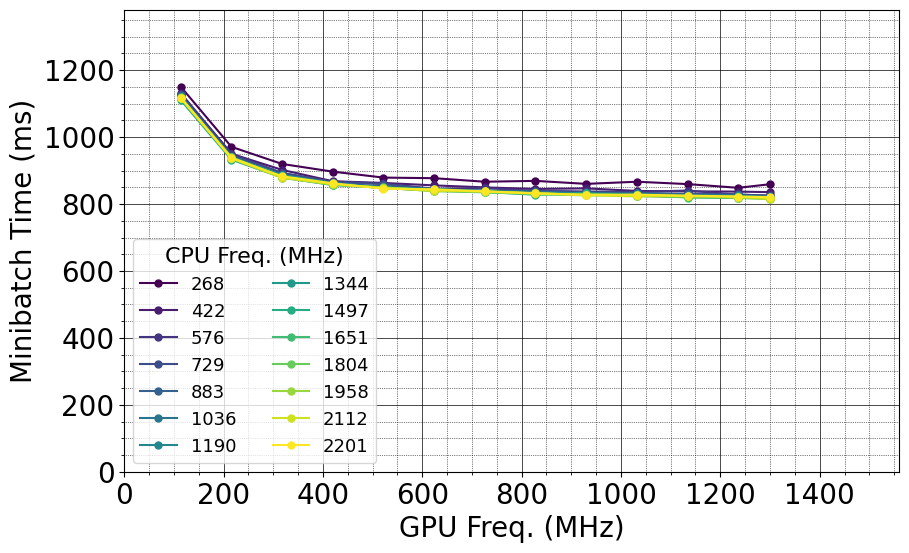

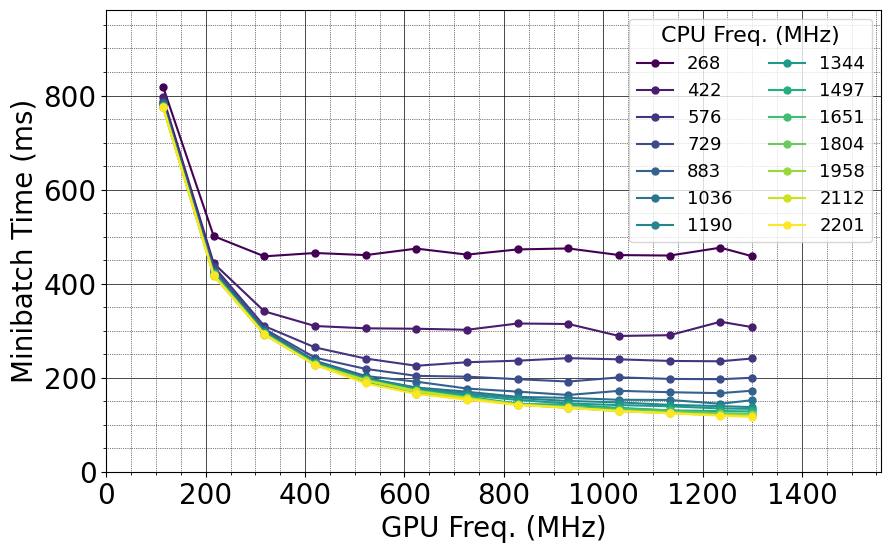

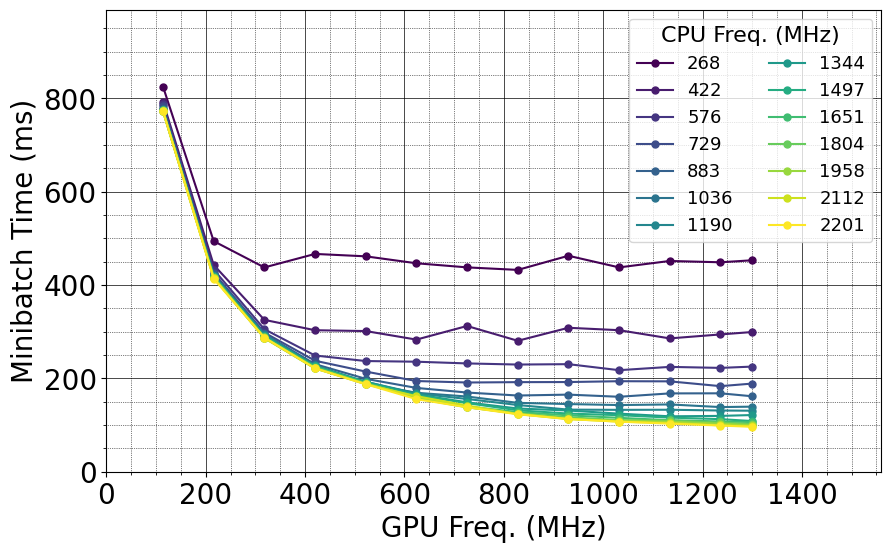

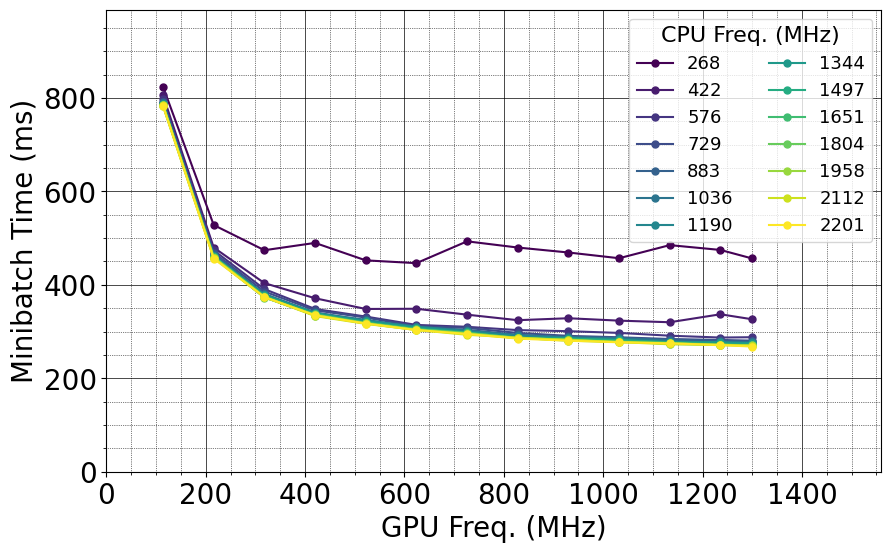

In [541]:
data = train_data.copy()
multi_line_plot_v1(data, 'gpu')

In [542]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

def multi_line_plot_v1_power(data, axis):

    data['cpu'] = (data['cpu']/1000).astype(int)
    data['gpu'] = (data['gpu']/1000000).astype(int)
    data['mem'] = (data['mem']/1000000).astype(int)

    mem_list = list(data['mem'].unique())
    gpu_list = list(data['gpu'].unique())
    cpu_list = list(data['cpu'].unique())
    cores_list = list(data['cores'].unique())

    cpus = data['cpu'].unique()
    
    num_colors = len(cpus)
    colors = cm.viridis(np.linspace(0, 1, num_colors))

    if axis == 'mem':
        data = data[(data['cores'] == 12)]
        for i in gpu_list:
            data_gpu = data[(data['gpu'] == i)]
            data_gpu.sort_values(by='mem', inplace=True)
            plt.figure(figsize=(10, 6))
            count = 0
            for cpu_freq, group in data_gpu.groupby('cpu'):
                # Plot each group with a line and markers ('o' for circle markers)
                plt.plot(group['mem'], group['observed_power'], marker='o', label=f'{cpu_freq} Mhz', linestyle='-', markersize=5, color = colors[count])
                count += 1
            
            plt.xlabel('Mem Frequency (Mhz)', fontsize=16)
            plt.ylabel('Power (W)', fontsize=16)
            # increase x and y tick label sizes
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.xlim(0, max(data_gpu['mem'])*1.2)
            plt.ylim(0, max(data_gpu['observed_power'])*1.2)
            plt.title('CPU Cores: 12 & GPU Frequency: '+str(i))
            plt.legend(title='CPU Frequency', ncols=2)
            plt.grid(True)
            plt.show()

    elif axis == 'gpu':
        data = data[(data['cores'] == 12)]
        for i in mem_list:
            data_mem = data[(data['mem'] == i)]
            data_mem.sort_values(by='gpu', inplace=True)
            plt.figure(figsize=(10, 6))
            count = 0
            for cpu_freq, group in data_mem.groupby('cpu'):
                # Plot each group with a line and markers ('o' for circle markers)                
                plt.plot(group['gpu'], group['observed_power'], marker='o', label=f'{cpu_freq}', linestyle='-', markersize=5, color = colors[count])
                count += 1
            plt.xlabel('GPU Freq. (MHz)', fontsize=20)
            plt.ylabel('Power (W)', fontsize=20)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            plt.xlim(0, max(data_mem['gpu'])*1.2)
            plt.ylim(0, max(data_mem['observed_power'])*1.2)
            # plt.title('CPU Cores: 12 & Mem Frequency: '+str(i),fontsize=20)
            plt.legend(title='CPU Freq. (MHz)', title_fontsize=13, ncols=2, fontsize=12)
            plt.minorticks_on()
            plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
            plt.savefig(f'mobnet_307{i}.pdf', format='pdf', dpi=300, bbox_inches='tight')
            plt.show()

    elif axis == 'cpu':
        data = data[(data['cores'] == 12)]
        for i in mem_list:
            data_mem = data[(data['mem'] == i)]
            data_mem.sort_values(by='cpu', inplace=True)
            plt.figure(figsize=(10, 6))
            count = 0
            for gpu_freq, group in data_mem.groupby('gpu'):
                # Plot each group with a line and markers ('o' for circle markers)                
                plt.plot(group['cpu'], group['observed_power'], marker='o', label=f'{gpu_freq} Mhz', linestyle='-', markersize=5, color = colors[count])
                count += 1
            plt.xlabel('CPU Frequency', fontsize=16)
            plt.ylabel('Power', fontsize=16)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.xlim(0, max(data_mem['cpu'])*1.2)
            plt.ylim(0, max(data_mem['observed_power'])*1.2)
            plt.title('CPU Cores: 12 & Mem Frequency: '+str(i))
            plt.legend(title='GPU Frequency', ncols=2)
            plt.grid(True)
            plt.show()


# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import pandas as pd
# import numpy as np

# def multi_line_plot_v1_power(data, axis):

#     data['cpu'] = (data['cpu']/1000).astype(int)
#     data['gpu'] = (data['gpu']/1000000).astype(int)
#     data['mem'] = (data['mem']/1000000).astype(int)

#     mem_list = list(data['mem'].unique())
#     gpu_list = list(data['gpu'].unique())
#     cpu_list = list(data['cpu'].unique())
#     cores_list = list(data['cores'].unique())

#     cpus = data['cpu'].unique()

#     if axis == 'mem':
#         data = data[(data['cores'] == 12)]
#         for i in gpu_list:
#             data_gpu = data[(data['gpu'] == i)]
#             data_gpu.sort_values(by='mem', inplace=True)
#             plt.figure(figsize=(10, 6))
#             count = 0
#             for cpu_freq, group in data_gpu.groupby('cpu'):
#                 # Adjust the colors based on CPU frequency
#                 color_intensity = 1 - (cpu_freq - min(cpus)) / (max(cpus) - min(cpus))
#                 color = cm.viridis(color_intensity)
#                 # Plot each group with a line and markers
#                 plt.plot(group['mem'], group['observed_power'], marker='o', label=f'{cpu_freq} Mhz', linestyle='-', markersize=5, color=color)
#                 count += 1
            
#             plt.xlabel('Mem Frequency (Mhz)', fontsize=16)
#             plt.ylabel('Power (W)', fontsize=16)
#             plt.xticks(fontsize=14)
#             plt.yticks(fontsize=14)
#             plt.xlim(0, max(data_gpu['mem'])*1.2)
#             plt.ylim(0, max(data_gpu['observed_power'])*1.2)
#             plt.title('CPU Cores: 12 & GPU Frequency: '+str(i))
#             plt.legend(title='CPU Frequency', ncols=2)
#             plt.grid(True)
#             plt.show()

#     elif axis == 'gpu':
#         data = data[(data['cores'] == 12)]
#         for i in mem_list:
#             data_mem = data[(data['mem'] == i)]
#             data_mem.sort_values(by='gpu', inplace=True)
#             plt.figure(figsize=(10, 6))
#             count = 0
#             for cpu_freq, group in data_mem.groupby('cpu'):
#                 # Adjust the colors based on CPU frequency
#                 color_intensity = 1 - (cpu_freq - min(cpus)) / (max(cpus) - min(cpus))
#                 color = cm.viridis(color_intensity)
#                 # Plot each group with a line and markers
#                 plt.plot(group['gpu'], group['observed_power'], marker='o', label=f'{cpu_freq}', linestyle='-', markersize=5, color=color)
#                 count += 1
#             plt.xlabel('GPU Frequency (MHz)', fontsize=20)
#             plt.ylabel('Power (W)', fontsize=20)
#             plt.xticks(fontsize=20)
#             plt.yticks(fontsize=20)
#             plt.xlim(0, max(data_mem['gpu'])*1.2)
#             plt.ylim(0, max(data_mem['observed_power'])*1.2)
#             # plt.title('CPU Cores: 12 & Mem Frequency: '+str(i),fontsize=20)
#             plt.legend(title='CPU Freq. (MHz)', title_fontsize=13, ncols=2, fontsize=12)
#             plt.minorticks_on()
#             plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#             plt.savefig(f'mobnet_307{i}.pdf', format='pdf', dpi=300, bbox_inches='tight')
#             plt.show()

#     elif axis == 'cpu':
#         data = data[(data['cores'] == 12)]
#         for i in mem_list:
#             data_mem = data[(data['mem'] == i)]
#             data_mem.sort_values(by='cpu', inplace=True)
#             plt.figure(figsize=(10, 6))
#             count = 0
#             for gpu_freq, group in data_mem.groupby('gpu'):
#                 # Adjust the colors based on CPU frequency
#                 color_intensity = 1 - (gpu_freq - min(cpus)) / (max(cpus) - min(cpus))
#                 color = cm.viridis(color_intensity)
#                 # Plot each group with a line and markers
#                 plt.plot(group['cpu'], group['observed_power'], marker='o', label=f'{gpu_freq} Mhz', linestyle='-', markersize=5, color=color)
#                 count += 1
#             plt.xlabel('CPU Frequency', fontsize=16)
#             plt.ylabel('Power (W)', fontsize=16)
#             plt.xticks(fontsize=14)
#             plt.yticks(fontsize=14)
#             plt.xlim(0, max(data_mem['cpu'])*1.2)
#             plt.ylim(0, max(data_mem['observed_power'])*1.2)
#             plt.title('CPU Cores: 12 & Mem Frequency: '+str(i))
#             plt.legend(title='GPU Frequency', ncols=2)
#             plt.grid(True)
#             plt.show()

In [543]:
model = 'mobnet'
train_data = pd.read_csv(f'/home/saisamarth/exp/{model}_train_data_final.csv')
train_data

,cores,cpu,gpu,mem,observed_time,observed_power
0,2,268800,1300500000,204000000,1105.067078,17.7045
1,2,268800,1300500000,2133000000,649.863098,18.7580
2,2,268800,1300500000,3199000000,615.035431,19.7600
3,2,268800,1300500000,665600000,751.245148,18.2540
4,2,268800,1236750000,204000000,3289.224731,14.4450
...,...,...,...,...,...,...
4363,12,2201600,216750000,665600000,455.977402,18.2570
4364,12,2201600,114750000,204000000,1117.970886,15.9490
4365,12,2201600,114750000,2133000000,775.267059,17.3570
4366,12,2201600,114750000,3199000000,772.271240,18.1630


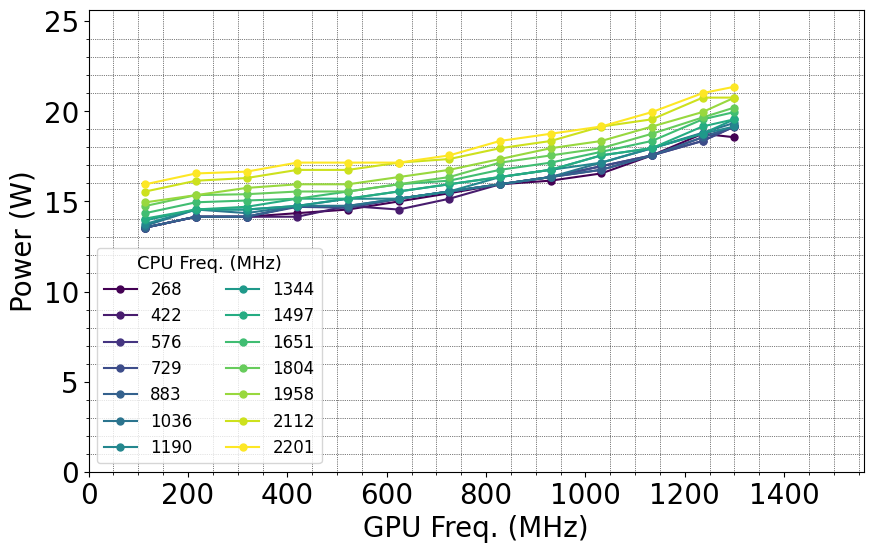

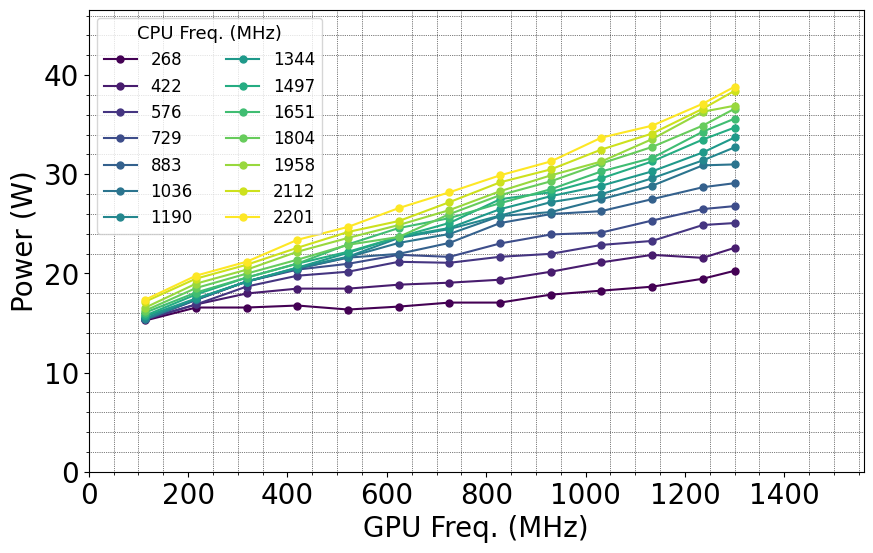

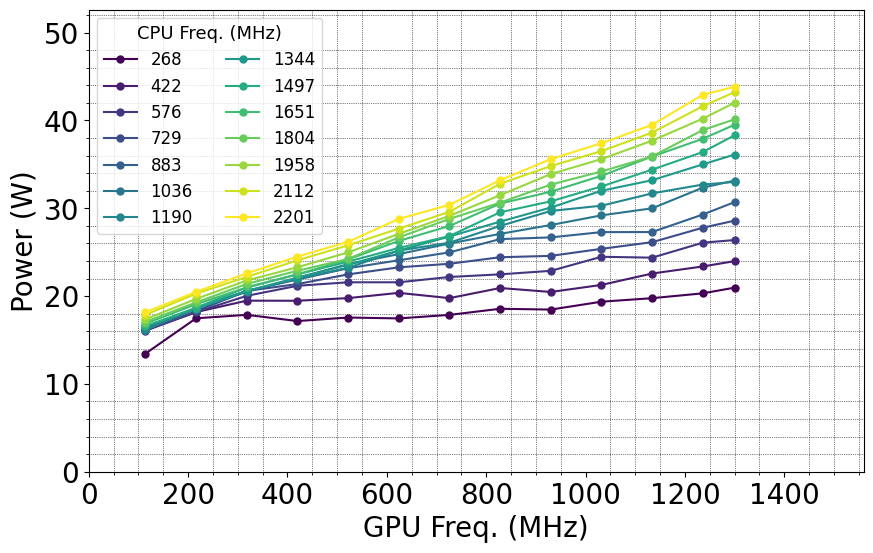

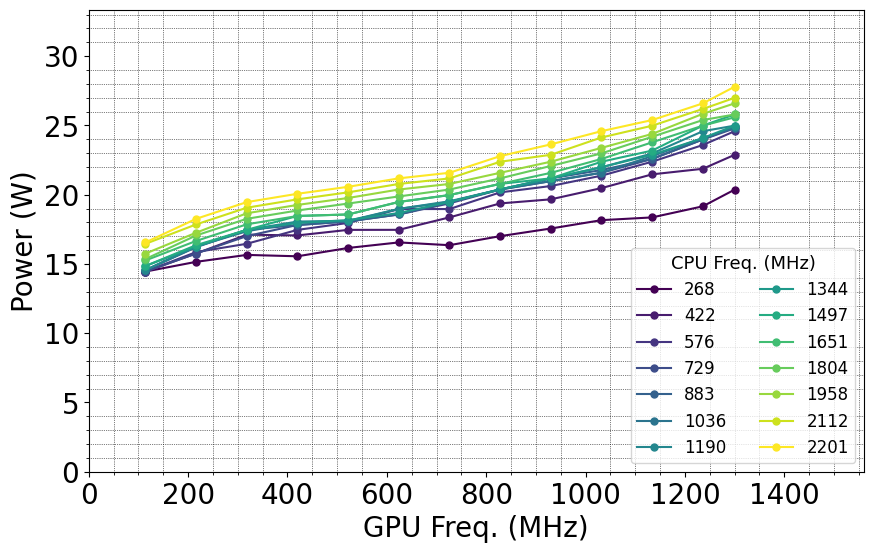

In [544]:
multi_line_plot_v1_power(train_data, 'gpu')